1. Carga los datos y explóralos. Elimina los datos nulos o incorrectos

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline

#FernandoSanchez Cargar los datos
df = pd.read_csv('cardio.csv')

#FernandoSanchez Explorar el dataset
print(df.info())

#FernandoSanchez Eliminar datos nulos
df = df.dropna()

#FernandoSanchez Verificar que no hay datos nulos después de eliminarlos
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   object 
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 529.9+ KB
N

2. Escoge tres variables cuantitativas y realiza un análisis descriptivo de ellas,
utilizando indicadores y gráficos. ¿Cuaĺ presenta mayor dispersión?

               age        sysBP          BMI
count  3656.000000  3656.000000  3656.000000
mean     49.557440   132.368025    25.784185
std       8.561133    22.092444     4.065913
min      32.000000    83.500000    15.540000
25%      42.000000   117.000000    23.080000
50%      49.000000   128.000000    25.380000
75%      56.000000   144.000000    28.040000
max      70.000000   295.000000    56.800000


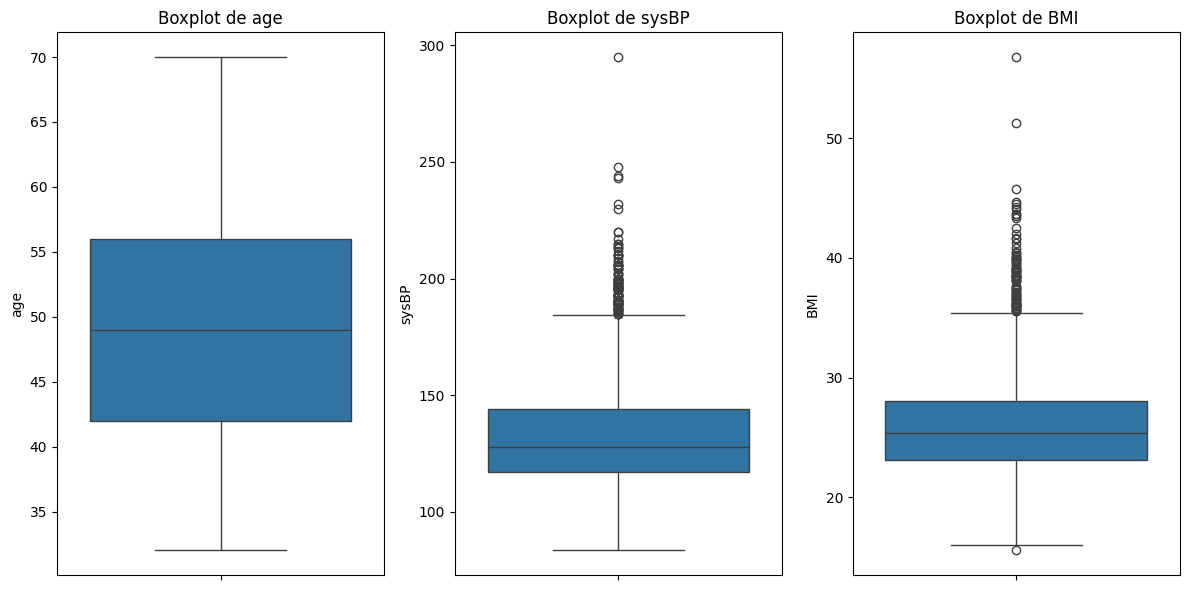

In [4]:
#FernandoSanchez Escoger tres variables cuantitativas (por ejemplo: Age, sysBP, BMI)
selected_vars = ['age', 'sysBP', 'BMI']

#FernandoSanchez Análisis descriptivo
print(df[selected_vars].describe())

#FernandoSanchez Gráficos
plt.figure(figsize=(12, 6))
for i, var in enumerate(selected_vars, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[var])
    plt.title(f'Boxplot de {var}')

plt.tight_layout()
plt.show()

"""El que tiene mayor dispersion viendolo graficamente es sysBP ya que sus valores se alejan con mayor fuerza de la caja y del extremo superior."""


3. Elimina los datos atípicos del dataset. Para las siguientes preguntas, considera el
dataset "limpio"

In [5]:
#FernandoSanchez Eliminar datos atípicos utilizando el rango intercuartílico
for var in selected_vars:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[var] >= lower_bound) & (df[var] <= upper_bound)]

#FernandoSanchez Verificar el nuevo tamaño del dataset
print(df.shape)


(3477, 16)


4. ¿Qué variables cuantitativas presentan mayor correlación? Explica.

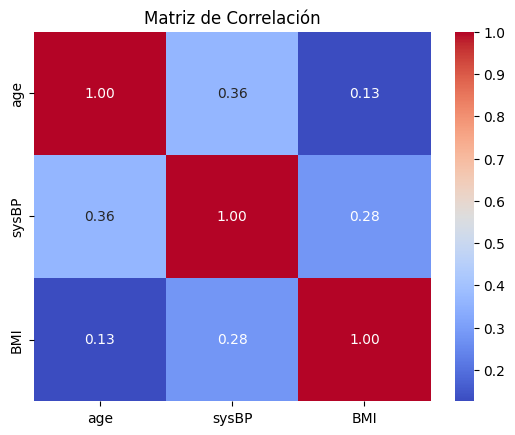

In [6]:
#FernandoSanchez Calcular la matriz de correlación
correlation_matrix = df[selected_vars].corr()

#FernandoSanchez Visualizar la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

"""Las variables con más correlación sería edad con sysPB pero la relación marcada es minima de 0.36"""

5. Si de este dataset se escoge un paciente al azar, ¿cuál es la probabilidad de que sea
hombre, si se sabe que pertenece al mayor cuartil de la variable correspondiente al
índice de masa corporal?

In [8]:
#FernandoSanchez Crear una variable binaria para el mayor cuartil de BMI
df['HighBMI'] = (df['BMI'] > df['BMI'].quantile(0.75)).astype(int)

#FernandoSanchez Calcular la probabilidad condicional
prob_hombre_en_mayor_cuartil_BMI = df[df['HighBMI'] == 1]['sex'].value_counts(normalize=True)['M']
print(f"Probabilidad de ser hombre dado el mayor cuartil de BMI: {prob_hombre_en_mayor_cuartil_BMI:.2%}")

"""La probabilidad indica un 54.02% a que sea hombre"""

Probabilidad de ser hombre dado el mayor cuartil de BMI: 54.02%


6. ¿Es razonable afirmar que, para una persona cualquiera (no necesariamente dentro
del dataset), su ritmo cardiaco promedio es 75? Explica y justifica.

In [9]:
#FernandoSanchez Calcular el promedio del ritmo cardíaco
promedio_ritmo_cardiaco = df['heartRate'].mean()
print(f"Promedio de ritmo cardíaco: {promedio_ritmo_cardiaco:.2f}")

"""Es razonable basandonos en nuestros datos el promedio esta en 75.49, externamente a eso el promedio de latido indicados por medicos es de 60-100 asi que esta dentro del rango"""

Promedio de ritmo cardíaco: 75.49


7. Ser hombre, ¿influye en el promedio de cigarrillos consumidos por día, dentro de los
pacientes fumadores? Explica.

In [18]:
#FernandoSanchez Filtrar pacientes fumadores
fumadores = df[df['currentSmoker'] == "Yes"]

#FernandoSanchez Verificar si hay datos disponibles antes de calcular el promedio
print("Número de fumadores hombres:", len(fumadores[fumadores['sex'] == 'M']))
print("Número de fumadores mujeres:", len(fumadores[fumadores['sex'] == 'F']))

#FernandoSanchez Calcular promedio solo si hay datos disponibles
if len(fumadores[fumadores['sex'] == 'M']) > 0:
    promedio_cigarrillos_hombres = fumadores[fumadores['sex'] == 'M']['cigsPerDay'].mean()
    print(f"Promedio de cigarrillos consumidos por día (hombres): {promedio_cigarrillos_hombres:.2f}")
else:
    print("No hay suficientes datos para calcular el promedio de cigarrillos consumidos por hombres.")

if len(fumadores[fumadores['sex'] == 'F']) > 0:
    promedio_cigarrillos_mujeres = fumadores[fumadores['sex'] == 'F']['cigsPerDay'].mean()
    print(f"Promedio de cigarrillos consumidos por día (mujeres): {promedio_cigarrillos_mujeres:.2f}")
else:
    print("No hay suficientes datos para calcular el promedio de cigarrillos consumidos por mujeres.")

"""Por el promedio y el numero de fumadores hombres notamos que si tiene influencia el ser hombre"""



Número de fumadores hombres: 962
Número de fumadores mujeres: 769
Promedio de cigarrillos consumidos por día (hombres): 22.28
Promedio de cigarrillos consumidos por día (mujeres): 13.80


8. Construye un modelo de regresión lineal que permita relacionar 6 variables del
dataset con el índice de masa corporal. (Debes incluir al menos dos variables
cualitativas). Evalúa tu modelo y explica.

In [26]:
#FernandoSanchez Seleccionar variables predictoras, incluyendo la variable categórica 'Education'
predictor_vars = ['age', 'sysBP', 'heartRate', 'glucose', 'currentSmoker', 'education']

#FernandoSanchez Separar las variables predictoras (X) y la variable de respuesta (y)
X = df[predictor_vars]
y = df['BMI']

#FernandoSanchez Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#FernandoSanchez Separar variables numéricas y categóricas
numeric_features = ['age', 'sysBP', 'heartRate', 'glucose']
categorical_features = ['currentSmoker', 'education']

#FernandoSanchez Crear un transformador para aplicar la codificación one-hot solo a las variables categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

#FernandoSanchez Aplicar la transformación a las variables predictoras del conjunto de entrenamiento
X_train_transformed = preprocessor.fit_transform(X_train)

#FernandoSanchez Crear y entrenar el modelo de regresión lineal con las variables transformadas
model = LinearRegression()
model.fit(X_train_transformed, y_train)

#FernandoSanchez Evaluar el modelo con las variables transformadas del conjunto de prueba
X_test_transformed = preprocessor.transform(X_test)
y_pred = model.predict(X_test_transformed)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

"""El MSE indica que las prediccciones del modelo tienen un error cuadratico medio de 16.02 en el BMI y la R-squared indica que el modelo explica el 16% de la variabilidad"""

Mean Squared Error: 16.02
R-squared: 0.16


9. Construye un modelo de regresión logística para predecir el riesgo de sufrir una
enfermedad coronaria en los próximos diez años, a partir de las variables descritas.
Verifica el balanceo de datos y evalúa tu modelo.

In [40]:
#FernandoSanchez Seleccionar variables predictoras
predictor_vars_logit = ['age', 'sysBP', 'BMI', 'prevalentHyp', 'diabetes', 'totChol']

#FernandoSanchez Dividir el conjunto de datos
X_train_logit, X_test_logit, y_train_logit, y_test_logit = train_test_split(df[predictor_vars_logit], df['TenYearCHD'], test_size=0.2, random_state=42)

#FernandoSanchez Verificar el balanceo de datos
print(df['TenYearCHD'].value_counts(normalize=True))

#FernandoSanchez Escalar las variables predictoras
scaler = StandardScaler()
X_train_logit_scaled = scaler.fit_transform(X_train_logit)
X_test_logit_scaled = scaler.transform(X_test_logit)

#FernandoSanchez Crear y entrenar el modelo de regresión logística con los datos escalados
logistic_model = LogisticRegression(random_state=42, max_iter=1000, solver='lbfgs')
logistic_model.fit(X_train_logit_scaled, y_train_logit)

#FernandoSanchez Predecir en el conjunto de prueba
y_pred_logit = logistic_model.predict(X_test_logit_scaled)

#FernandoSanchez Evaluar el modelo
accuracy = accuracy_score(y_test_logit, y_pred_logit)
conf_matrix = confusion_matrix(y_test_logit, y_pred_logit)
classification_rep = classification_report(y_test_logit, y_pred_logit)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

"""Aunque la precisión general es relativamente alta, el modelo tiene dificultades para predecir la clase minoritaria (riesgo de enfermedad coronaria).
Dado el desequilibrio en los datos, es importante considerar otras métricas como el área bajo la curva ROC (AUC-ROC) o la sensibilidad y 
especificidad para obtener una evaluación más completa del rendimiento del modelo. Además, técnicas como la remuestreo o el ajuste de pesos de clase podrían abordar el desequilibrio de clase."""

TenYearCHD
0    0.847648
1    0.152352
Name: proportion, dtype: float64
Accuracy: 0.83
Confusion Matrix:
[[605   5]
 [118   4]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       610
           1       0.44      0.03      0.06       122

    accuracy                           0.83       732
   macro avg       0.64      0.51      0.48       732
weighted avg       0.77      0.83      0.77       732



'Aunque la precisión general es relativamente alta, el modelo tiene dificultades para predecir la clase minoritaria (riesgo de enfermedad coronaria).\nDado el desequilibrio en los datos, es importante considerar otras métricas como el área bajo la curva ROC (AUC-ROC) o la sensibilidad y \nespecificidad para obtener una evaluación más completa del rendimiento del modelo. Además, técnicas como la remuestreo o el ajuste de pesos de clase podrían abordar el desequilibrio de clase.'

10. Separa los modelos de regresión anteriores en dos distintos, respectivamente,
considerando alguna variable categórica. Compara y concluye.

In [37]:
#FernandoSanchez Seleccionar variables predictoras
predictor_vars_logit = ['age', 'sysBP', 'BMI', 'prevalentHyp', 'diabetes', 'totChol', 'sex']

#FernandoSanchez Filtrar datos para hombres y mujeres
df_male = df[df['sex'] == 'M']
df_female = df[df['sex'] == 'F']

#FernandoSanchez Dividir conjuntos de datos para hombres y mujeres
X_train_male, X_test_male, y_train_male, y_test_male = train_test_split(df_male[predictor_vars_logit], df_male['TenYearCHD'], test_size=0.2, random_state=42)
X_train_female, X_test_female, y_train_female, y_test_female = train_test_split(df_female[predictor_vars_logit], df_female['TenYearCHD'], test_size=0.2, random_state=42)

#FernandoSanchez Crear transformadores para escalar variables numéricas y codificar variables categóricas
numeric_features = ['age', 'sysBP', 'BMI', 'totChol']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_features = ['sex']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])

#FernandoSanchez Combinar transformadores
preprocessor_male = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

preprocessor_female = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

#FernandoSanchez Crear y entrenar modelos de regresión logística para hombres y mujeres
logistic_model_male = Pipeline(steps=[
    ('preprocessor', preprocessor_male),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000, solver='lbfgs'))
])

logistic_model_female = Pipeline(steps=[
    ('preprocessor', preprocessor_female),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000, solver='lbfgs'))
])

#FernandoSanchez Entrenar modelos
logistic_model_male.fit(X_train_male, y_train_male)
logistic_model_female.fit(X_train_female, y_train_female)

#FernandoSanchez Predecir en los conjuntos de prueba
y_pred_male = logistic_model_male.predict(X_test_male)
y_pred_female = logistic_model_female.predict(X_test_female)

#FernandoSanchez Evaluar los modelos
accuracy_male = accuracy_score(y_test_male, y_pred_male)
conf_matrix_male = confusion_matrix(y_test_male, y_pred_male)
classification_rep_male = classification_report(y_test_male, y_pred_male, zero_division=1)  #FernandoSanchez Agregar zero_division

accuracy_female = accuracy_score(y_test_female, y_pred_female)
conf_matrix_female = confusion_matrix(y_test_female, y_pred_female)
classification_rep_female = classification_report(y_test_female, y_pred_female, zero_division=1)  #FernandoSanchez Agregar zero_division

#FernandoSanchez Imprimir resultados
print("Resultados para hombres:")
print(f'Accuracy: {accuracy_male:.2f}')
print('Confusion Matrix:')
print(conf_matrix_male)
print('Classification Report:')
print(classification_rep_male)

print("\nResultados para mujeres:")
print(f'Accuracy: {accuracy_female:.2f}')
print('Confusion Matrix:')
print(conf_matrix_female)
print('Classification Report:')
print(classification_rep_female)

"""Para hombres, el modelo tiene una precisión (accuracy) del 78%. Sin embargo, la capacidad para predecir la clase 1 (enfermedad coronaria en los próximos diez años) es limitada, 
ya que tiene un bajo recall y f1-score para esa clase.
Para mujeres, el modelo tiene una precisión del 86%. 
Sin embargo, la capacidad para predecir la clase 1 es extremadamente baja, ya que no ha predicho correctamente ningún caso (recall, precision y f1-score son todos cero).
La evaluación del modelo debe considerar la naturaleza desbalanceada de las clases."""


Resultados para hombres:
Accuracy: 0.78
Confusion Matrix:
[[253   1]
 [ 69   2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       254
           1       0.67      0.03      0.05        71

    accuracy                           0.78       325
   macro avg       0.73      0.51      0.47       325
weighted avg       0.76      0.78      0.70       325


Resultados para mujeres:
Accuracy: 0.86
Confusion Matrix:
[[350   0]
 [ 57   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       350
           1       1.00      0.00      0.00        57

    accuracy                           0.86       407
   macro avg       0.93      0.50      0.46       407
weighted avg       0.88      0.86      0.80       407

